#  0 - Information

# 1 - Packages

In [264]:
%matplotlib inline

# Dataset packages
import pandas as pd

# Mathematical packages
import numpy as np
np.seed = 42

# Graphic packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2 - Exercise 3

## 2.1 - Question 1 

In [357]:
def graphics(x, y, w, w_app):
    """This functions display x and y through a scatter plot."""
    
    # Parameters figure
    plt.figure(figsize=(8,8))
    plt.grid(True)
    
    # Display points
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y[:, 0])
    
    # Display true decision line
    x_d = np.linspace(x.min(), x.max(), 1000).reshape((-1,1))
    y_d = x_d * -w[0] / w[1]
    plt.plot(x_d, y_d, color='g')
    
    # Display approximated decision line
    y_d = x_d * -w_app[0] / w_app[1]
    plt.plot(x_d, y_d, color='r')
    
    # Display results
    plt.show()

In [358]:
def SGD(x, y, criterion=10e-5):
    """This function compute the stochastic gradient descent for a linear model."""
    
    # Parameters
    n, d = np.shape(x)
    
    # Initialization
    w_t_1 = np.zeros((d, 1))
    w_t = w_t_1 + 1 
    
    # Number of iteration
    n_iter = 1
    
    # Loop on the SGD
    while np.linalg.norm(w_t - w_t_1) > criterion:
        
        # Choice of a random value among the x
        i_t = np.random.randint(0, n)
        x_t = x[i_t].reshape((-1,1))
        y_t = y[i_t].reshape((-1,1))
        
        # Step for the SGD
        step = 1 / n_iter
        
        # One step of the SGD
        w_t_1 = w_t
        w_t = w_t + step * (2/n * np.dot(x_t, (y_t - (np.dot(np.transpose(w_t), x_t)))))
                            
    # Return the result
    return w_t

## 2.2 - Question 2

In [359]:
def generateRandomValues(w, n=100):
    """This function generates random values for x and y for a given w."""
    
    # Generate random point in R2
    x = np.random.randn(n, 2)
    y = []
        
    # Attach to each point a class 1 or -1        
    for i in range(n):
        x_2_bord = -w[0] / w[1] * x[i, 0]

        if x_2_bord > x[i, 1]:
            y.append([-1])

        else:
            y.append([1])
                
    # Assure that y is composed of int
    y = np.array([[int(j[0])] for j in y])
                
    # Return the results
    return [x, y]

In [360]:
# Generate a random w
w = np.random.randn(2, 1).reshape((2, 1))
print("True w: ", w, "\n")

# Generate random values
x, y = generateRandomValues(w)
# print("X: ", x)
# print("Y: ", y)

True w:  [[-1.90618601]
 [ 1.29110331]] 



### Test of the SGD

True w:  [[-1.90618601]
 [ 1.29110331]] 

Approximated w:  [[-0.69793194]
 [ 0.47142907]]


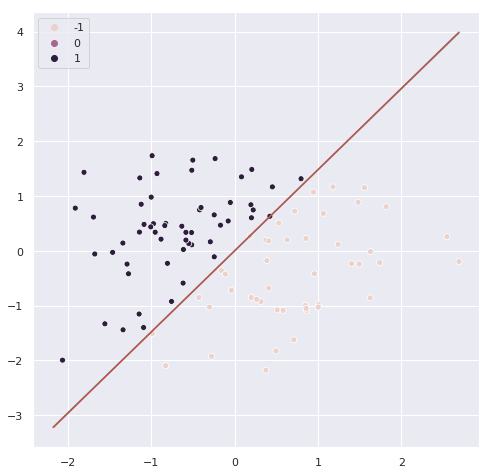

In [362]:
# Compute approximation of w
w_app = SGD(x, y)

# Display result
print("True w: ", w, "\n")
print("Approximated w: ", w_app)

# Display on a map
graphics(x, y, w, w_app)

## 2.3 - Question 3

In [363]:
def addGaussianNoise(x, sigma=1):
    """This function adds a gausian noise to x"""
    
    # Parameters
    n = len(x)
    
    # Add a random noise
    x_app = x + np.random.normal(scale=sigma, size=(n,2))
    
    # Return the results
    return x_app

In [364]:
# Add a noise to the values of x
x_noisy = addGaussianNoise(x)

# Display result
print("Noisy x: ", x_noisy)

Noisy x:  [[-1.91199868  0.6696319 ]
 [ 2.30765995  0.01350119]
 [ 0.97931606 -1.18038157]
 [ 0.42449463 -0.47527325]
 [-0.54655358 -1.09552046]
 [-0.83612789  0.93207419]
 [-1.11010779 -0.88453838]
 [ 1.42876778  0.53299226]
 [ 0.37185583 -0.56880797]
 [ 1.84272691 -1.5108052 ]
 [ 2.96347642  0.75654881]
 [ 1.34311844 -1.5739427 ]
 [-2.1351335  -0.03660599]
 [-0.30829487  0.47776512]
 [ 0.42298352  0.67723652]
 [-1.25653799 -1.07161387]
 [ 0.54644678 -1.4893576 ]
 [ 1.24765521 -3.71475641]
 [-1.11297369  0.2400928 ]
 [-0.04830784  1.30039336]
 [ 1.56577951 -2.605998  ]
 [-0.22780221 -0.53467136]
 [ 1.06633333  2.01997394]
 [ 0.06774733  2.04381103]
 [ 0.68906192  2.12179468]
 [-0.60764864 -2.49534111]
 [-1.96044026 -1.14976217]
 [-0.72720382 -0.84498656]
 [-2.22311941  2.69494659]
 [ 2.05836888 -0.43465826]
 [ 0.24855549  2.90285782]
 [ 2.09329887  0.69023153]
 [-1.99488847 -0.3562328 ]
 [ 0.62533011 -0.71813023]
 [ 0.49766816  0.2735022 ]
 [-1.0195797   1.97050708]
 [-0.058159    0.7

### Test of SGD

True w:  [[-1.90618601]
 [ 1.29110331]] 

Approximated w:  [[-0.27938769]
 [ 0.30191706]]


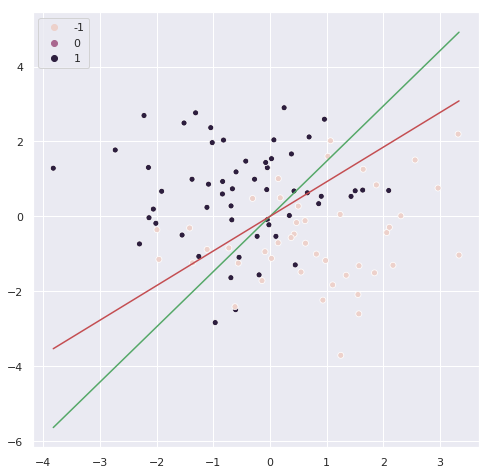

In [365]:
# Compute approximation of w
w_app_noisy = SGD(x_noisy, y)

# Display result
print("True w: ", w, "\n")
print("Approximated w: ", w_app_noisy)

# Display on a map
graphics(x_noisy, y, w, w_app_noisy)

## 2.5 - Question 5

In [366]:
def readCsv(path):
    """This function extracts the features and value x and y from the file 
       located at 'path'."""
    
    # Read csv
    df = pd.read_csv(path)
    
    # Change 2 and 4 by 0 and 1
    df.iloc[:, -1] = df.iloc[:,-1].apply(lambda x: x/2 - 1)
    
    # Replace string by float
    df.iloc[:, 6] = df.iloc[:, 6].replace('?', 0)
    
    # Change type
    df = df.astype(float)
    
    # Extract x and y
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape((-1, 1))
    
    # Normalize x
    x = x / (x.max(axis=0) - x.min(axis=0))
    x = (x - x.mean(axis=0))
    
    # Return results
    return [x, y]    

In [367]:
# Read the data of the dataset contained in 'Data'
x_data, y_data = readCsv("./Data/data_wisconsin.csv")

# # Display results
# print("X: ", x_data)
# print("Y: ", y_data)

### Test of the SGD

Approximated w:  [[0.99966969]
 [0.89348081]
 [0.8680769 ]
 [0.86997989]
 [0.89110384]
 [0.92002009]
 [0.85200039]
 [0.9001621 ]
 [0.89855726]
 [0.97778359]]


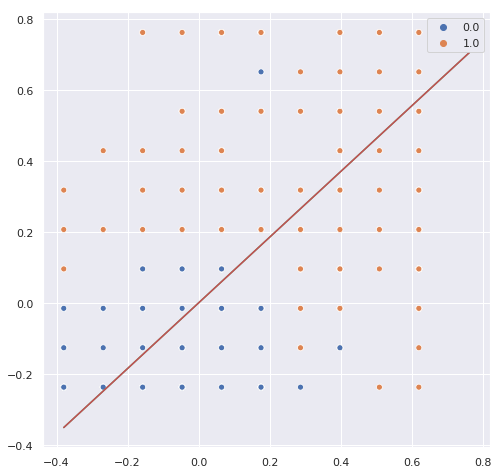

In [368]:
# Compute approximation of w
w_app_data = SGD(x_data, y_data)

# Display result
print("Approximated w: ", w_app_data)

# Display on a map
graphics(x_data[:, 1:3], y_data, w_app_noisy, w_app_noisy)